## UNIVERSIDAD CENTRAL DEL ECUADOR
### Facultad de Ingeniería y Ciencias Aplicadas
### Criptografía y Seguridad de la Información
**Fecha de entrega:** 14-noviembre-2025

**Grupo 2**

**Integrantes:**


*   Andino Jhon
*   Borja Diego
*   Cajamarca Anthony
*   Cruz Kevin
*   Jami Mateo

# **CRIPTOGRAFÍA ASIMÉTRICA: DSA (Digital Signature Algorithm)**

**DSA**

DSA es un algoritmo asimétrico diseñado para firmas digitales, no para cifrar mensajes.
Fue adoptado por el gobierno de EE. UU. como estándar DSS (Digital Signature Standard).

*Características principales:*

Usa dos claves distintas:
*   Privada: usada para firmar.
*   Pública: usada para verificar la firma.

Basado en la dificultad del logaritmo discreto.

Asegura autenticidad e integridad del mensaje (garantiza que nadie lo modificó).

*Funcionamiento general*
1.   El emisor genera un par de claves (pública y privada).
2.   Firma digitalmente un mensaje con su clave privada.
3.   El receptor verifica la firma usando la clave pública.
4.   Si la verificación es correcta, el mensaje no fue alterado y proviene del emisor.



In [ ]:
!pip install pycryptodome

In [22]:
import sys
import time
import os
import copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
from Crypto.PublicKey import DSA
from Crypto.Signature import DSS
from Crypto.Hash import SHA256

In [5]:
# --- Generacion de claves ---
key = DSA.generate(2048)  # Genera clave privada (2048 bits)
public_key = key.publickey()  # Deriva la clave pública

In [6]:
mensaje = b"ingeniero geovanny es chevere xD"

In [7]:
# --- Firma Digital ---
hash_obj = SHA256.new(mensaje)
signer = DSS.new(key, 'fips-186-3')  # Estándar DSA
firma = signer.sign(hash_obj)
print("🖋️ Firma digital generada:", firma)

🖋️ Firma digital generada: b'M\xe7\xb2\xb0\np\x15\x05@d\t\x1e!\xea\xd6`\x05\x91\xef\xbb\x05\x83F\x1c}\xddf\x81\x89FV[N\xd0\xc3\xd0\\\xc9J)\xeeG\xf4\x8bh\x00\xb3G\xb1\xca\x9c\xc1\tO\xbdq'


In [8]:
# --- Definicion de la funcion verify_signature para los casos de prueba ---
def verify_signature(pub_key, msg, sig):
    h = SHA256.new(msg)
    verifier_func = DSS.new(pub_key, 'fips-186-3')
    try:
        verifier_func.verify(h, sig)
        print("✅ La firma es válida. El mensaje es auténtico.")
    except ValueError:
        print("❌ Firma inválida o mensaje alterado.")

In [9]:
# --- Verificacion
verifier = DSS.new(public_key, 'fips-186-3')
try:
    verifier.verify(hash_obj, firma)
    print("✅ La firma es válida. El mensaje es auténtico.")
except ValueError:
    print("❌ Firma inválida o mensaje alterado.")

✅ La firma es válida. El mensaje es auténtico.


**Casos de pruebas para que su resultado sea erroneo**

In [10]:
# -----------------------------
# Caso 1: modificar el mensaje -> integridad rota
# -----------------------------
print("--- Caso 1: mensaje modificado ---")

mensaje_modificado = b"ingeniero geovanny es chevere xDDD1" # Creamos un mensaje modificado para este caso
verify_signature(public_key, mensaje_modificado, firma)
# ❌ Firma inválida, por qué: la firma cubre el hash del mensaje original; si el mensaje cambia, el hash cambia.

--- Caso 1: mensaje modificado ---
❌ Firma inválida o mensaje alterado.


In [11]:
# -----------------------------
# Caso 2: alterar bytes de la firma -> firma corrupta
# -----------------------------
print("--- Caso 2: firma alterada (un byte cambiado) ---")

sig_list = bytearray(firma) # hacer copia mutable y cambiar un byte
sig_list[0] = (sig_list[0] + 1) % 256  # cambiar un byte (pequeña corrupción)
corrupted_signature = bytes(sig_list)
verify_signature(public_key, mensaje, corrupted_signature)
# ❌ Firma inválida, por qué: la firma es una estructura matemática; cambiar un byte típicamente invalida la verificación.

--- Caso 2: firma alterada (un byte cambiado) ---
❌ Firma inválida o mensaje alterado.


In [12]:
# -----------------------------
# Caso 3: verificar con otra clave pública -> clave no corresponde
# -----------------------------
print("--- Caso 3: verificar con clave pública distinta ---")
other_private = DSA.generate(2048)
other_public = other_private.publickey()
verify_signature(other_public, mensaje, firma)
# ❌ Firma inválida, por qué: la firma fue creada con la clave privada original; otra clave pública no puede verificarla.

--- Caso 3: verificar con clave pública distinta ---
❌ Firma inválida o mensaje alterado.


***`Resumen:`***

Genera un par de claves DSA (privada y pública).

Crea un hash SHA-256 del mensaje (necesario para firmar).

Firma el hash con la clave privada.

Verifica la firma con la clave pública.

**Leer un archivo con el texto del mensaje a cifrar.**

In [21]:
drive.mount('/content/drive')

BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks/Criptografia/text"

text_files_in_drive = []

if not os.path.exists(BASE_FOLDER):
    print(f"Error: BASE_FOLDER '{BASE_FOLDER}' no existe. Asegúrate de que Google Drive esté montado y la ruta sea correcta.")
else:
    print(f"Buscando archivos .txt en: {BASE_FOLDER}")
    # 2. Usa el módulo os para listar todos los archivos y directorios dentro de BASE_FOLDER
    for entry in os.listdir(BASE_FOLDER):
        full_path = os.path.join(BASE_FOLDER, entry)
        # Verifica si es un archivo y tiene una extensión .txt
        if os.path.isfile(full_path) and entry.endswith('.txt'):
            text_files_in_drive.append(full_path)
            # 4. Asegura que no se añadan más de 7 archivos
            if len(text_files_in_drive) >= 7:
                break

# 5. Imprime la lista de rutas de archivos de texto identificados
if text_files_in_drive:
    print("Archivos de texto identificados para pruebas de rendimiento:")
    for f in text_files_in_drive:
        print(f)
else:
    print("No se encontraron archivos .txt en la BASE_FOLDER especificada.")

Mounted at /content/drive
Buscando archivos .txt en: /content/drive/MyDrive/Colab Notebooks/Criptografia/text
Archivos de texto identificados para pruebas de rendimiento:
/content/drive/MyDrive/Colab Notebooks/Criptografia/text/test_10_words.txt
/content/drive/MyDrive/Colab Notebooks/Criptografia/text/test_100_words.txt
/content/drive/MyDrive/Colab Notebooks/Criptografia/text/test_1000_words.txt
/content/drive/MyDrive/Colab Notebooks/Criptografia/text/test_10000_words.txt
/content/drive/MyDrive/Colab Notebooks/Criptografia/text/test_100000_words.txt
/content/drive/MyDrive/Colab Notebooks/Criptografia/text/test_1000000_words.txt
/content/drive/MyDrive/Colab Notebooks/Criptografia/text/test_10000000_words.txt


In [41]:
# Lista donde guardaremos resultados
drive_performance_results = []
total_time_all_files = 0.0

# ----- Generar par de claves DSA una sola vez (privada + pública) -----
# Generamos 2048 bits (ajusta si necesitas otra longitud)
print("Generando par de claves DSA (esto puede tomar unos segundos)...")
key_pair = DSA.generate(2048)
private_key = key_pair               # clave privada (objeto)
public_key = key_pair.publickey()    # clave pública (objeto)
print("Claves generadas correctamente.\n")

print("\n--- Procesando archivos de Google Drive ---")

for file_path in text_files_in_drive:
    file_name = os.path.basename(file_path)
    print(f"\n--- Procesando archivo: {file_name} ---")

    # ---------- 1) Leer el archivo y medir tiempo de lectura ----------
    t0 = time.perf_counter()
    try:
        with open(file_path, 'rb') as f:
            message_bytes = f.read()
    except FileNotFoundError:
        print(f"Error: Archivo {file_path} no encontrado. Saltando.")
        continue
    except Exception as e:
        print(f"Error leyendo el archivo {file_path}: {e}. Saltando.")
        continue
    t1 = time.perf_counter()
    read_time = t1 - t0
    print(f"Tiempo de lectura: {read_time:.6f} segundos")

    # Decodificar a string para contar palabras y caracteres (input_char_count)
    decoded_message = message_bytes.decode('utf-8', errors='ignore')
    word_count = len(decoded_message.split())
    input_char_count = len(decoded_message)   # <-- ahora es la cadena de entrada (nº caracteres)
    print(f"Conteo de palabras (estimado): {word_count}, Caracteres de entrada: {input_char_count}")

    # ---------- 2) Firma digital (medición: encrypt_time) ----------
    t0 = time.perf_counter()
    try:
        hash_obj_sign = SHA256.new(message_bytes)
        signer = DSS.new(private_key, 'fips-186-3')
        signature = signer.sign(hash_obj_sign)
        sign_ok = True
    except Exception as e:
        signature = b''
        sign_ok = False
        print(f"Error generando la firma: {e}")
    t1 = time.perf_counter()
    encrypt_time = t1 - t0
    print(f"Tiempo de firma (cifrado): {encrypt_time:.6f} segundos")

    # ---------- definir output_char_count como longitud de la firma ----------
    output_char_count = len(signature)
    print(f"Longitud de la firma (bytes): {output_char_count}")

    # Imprimir firma hex truncada para inspección
    sig_hex = signature.hex()
    print("\nFirma en hexadecimal COMPLETA:")
    print(sig_hex)
    print()

    # ---------- 3) Verificación de la firma (medición: decrypt_time) ----------
    t0 = time.perf_counter()
    verification_status = "❌ Fallido"
    try:
        hash_obj_verify = SHA256.new(message_bytes)
        verifier = DSS.new(public_key, 'fips-186-3')
        verifier.verify(hash_obj_verify, signature)
        verification_status = "✅ Éxito"
    except ValueError:
        verification_status = "❌ Fallido"
    except Exception as e:
        verification_status = f"❌ Error: {e}"
    t1 = time.perf_counter()
    decrypt_time = t1 - t0
    print(f"Tiempo de verificación (descifrado): {decrypt_time:.6f} segundos")
    print(f"Verificación: {verification_status}")

    # ---------- 4) Acumular tiempo total por archivo ----------
    total_time_all_files += (read_time + encrypt_time + decrypt_time)

    # ---------- 5) Almacenar resultados en la estructura ----------
    drive_performance_results.append({
        'file_name': file_name,
        'word_count': word_count,
        'read_time': read_time,
        'encrypt_time': encrypt_time,
        'decrypt_time': decrypt_time,
        'input_char_count': input_char_count,    # cadena de entrada (nº caracteres)
        'output_char_count': output_char_count,  # longitud de la firma (bytes)
    })

print("\n--- Procesamiento de archivos finalizado ---")
print(f"Tiempo total de procesamiento para todos los archivos: {total_time_all_files:.6f} segundos")

Generando par de claves DSA (esto puede tomar unos segundos)...
Claves generadas correctamente.


--- Procesando archivos de Google Drive ---

--- Procesando archivo: test_10_words.txt ---
Tiempo de lectura: 0.003693 segundos
Conteo de palabras (estimado): 10, Caracteres de entrada: 129
Tiempo de firma (cifrado): 0.002443 segundos
Longitud de la firma (bytes): 56

Firma en hexadecimal COMPLETA:
11589663f78ee4ad6ccad27f529e6f7f9da56d6b1ffa0c16d6848fc926f8bdf94caae2906b666ba3448db1c0bc9fec0636cc1956e9ce4e0d

Tiempo de verificación (descifrado): 0.002328 segundos
Verificación: ✅ Éxito

--- Procesando archivo: test_100_words.txt ---
Tiempo de lectura: 0.007247 segundos
Conteo de palabras (estimado): 100, Caracteres de entrada: 1299
Tiempo de firma (cifrado): 0.004741 segundos
Longitud de la firma (bytes): 56

Firma en hexadecimal COMPLETA:
2dc58bbb0711b0ce9a357fa702855589a097b4a5cb43f2dbbe8235b835901df7c5f2d062d7099cc7181929b70c688eda1415ed4a5839637f

Tiempo de verificación (descifrado): 0

## Resumir y Analizar Resultados

Tabla con los tiempos de lectura, cifrado y descifrado para cada archivo de Drive. Se generará una gráfica para visualizar las tendencias y se proporcionará un análisis breve sobre cómo el tamaño de los archivos afecta el rendimiento.


In [42]:
print("\n--- Resumen de Resultados de Rendimiento desde Google Drive ---")

# Convierte los resultados a un DataFrame de pandas para una mejor visualización y análisis
df_drive_performance = pd.DataFrame(drive_performance_results)
print(df_drive_performance)

print("\n--- Análisis de Tendencias de Rendimiento desde Google Drive ---\n")


--- Resumen de Resultados de Rendimiento desde Google Drive ---
                 file_name  word_count  read_time  encrypt_time  decrypt_time  \
0        test_10_words.txt          10   0.003693      0.002443      0.002328   
1       test_100_words.txt         100   0.007247      0.004741      0.002339   
2      test_1000_words.txt        1000   0.006150      0.002040      0.002418   
3     test_10000_words.txt       10000   0.005183      0.005318      0.005169   
4    test_100000_words.txt      100000   0.011424      0.012852      0.014778   
5   test_1000000_words.txt     1000000   0.035009      0.082051      0.073882   
6  test_10000000_words.txt    10000000   0.319207      0.729163      0.728183   

   input_char_count  output_char_count  
0               129                 56  
1              1299                 56  
2             12999                 56  
3            129999                 56  
4           1299999                 56  
5          12999999                 56  

# Análisis de Rendimiento: Firma Digital (DSA)

El siguiente reporte resume los resultados obtenidos al medir el rendimiento de la **generación y verificación de firmas digitales con DSA** sobre archivos de texto almacenados en Google Drive.  
Para cada archivo se midieron: **tiempo de lectura**, **tiempo de firma** (equivalente a "encrypt_time") y **tiempo de verificación** (equivalente a "decrypt_time"). Además se registró el número de caracteres de entrada y la longitud de la firma generada.

## Tabla de resultados

| nombre de archivo | número de palabras | tiempo de lectura (s) | tiempo de encriptación (s) | tiempo de desencriptación (s) | número de caracteres de entrada | número de caracteres de salida |
|---|---:|---:|---:|---:|---:|---:|
| test_10_words.txt | 10 | 0.013809 | 0.001296 | 0.001302 | 129 | 56 |
| test_100_words.txt | 100 | 0.002414 | 0.001847 | 0.002457 | 1299 | 56 |
| test_1000_words.txt | 1000 | 0.002369 | 0.001339 | 0.002108 | 12999 | 56 |
| test_10000_words.txt | 10000 | 0.002337 | 0.002843 | 0.002116 | 129999 | 56 |
| test_100000_words.txt | 100000 | 0.008427 | 0.012162 | 0.013140 | 1299999 | 56 |
| test_1000000_words.txt | 1000000 | 0.027853 | 0.073032 | 0.071151 | 12999999 | 56 |
| test_10000000_words.txt | 10000000 | 0.203200 | 0.726807 | 0.713192 | 129999999 | 56 |

**Tiempo total de procesamiento para todos los archivos:** 2.801524 segundos


---

## Análisis de tendencias

1. **Tiempo de lectura:** crece de forma proporcional al tamaño del archivo, como se espera al leer más bytes desde el almacenamiento.
2. **Tiempo de firma (DSA):** aumenta con el tamaño del texto de entrada — aunque la firma resultante tiene tamaño fijo, la operación de calcular la firma requiere procesar (hashear) todo el contenido.
3. **Tiempo de verificación:** es prácticamente equivalente al tiempo de firma, porque la verificación vuelve a realizar operaciones criptográficas sobre el mismo contenido (hash + comprobación).
4. **Tamaño de salida fijo (56 bytes):** la firma DSA (en formato DER/ASN.1 para una clave de 2048 bits) tiene un tamaño constante en bytes independientemente del tamaño del mensaje. Esto explica por qué `output_char_count` aparece igual para todos los archivos.
5. **Escalabilidad:** DSA muestra comportamiento estable ante entradas muy grandes; los costes aumentan de forma predecible y el principal cuello de botella es el procesamiento criptográfico (hash + firma/verificación), no la E/S en muchos casos.

---

## Conclusiones

- El experimento confirma que **DSA es adecuado para generar firmas sobre mensajes de cualquier tamaño**, ya que el resultado tiene un tamaño compacto (fácil de almacenar/transmitir).
- **El tiempo total de procesamiento** está dominado por la operación de firma/verificación cuando los archivos son grandes; la lectura es comparativamente rápida.
- El tamaño fijo de la firma facilita el almacenamiento/transferencia, pero **no** implica que el algoritmo no procese todo el mensaje: internamente se calcula primero un hash del mensaje y luego se firma ese hash.
- Para cargas masivas (archivos muy grandes) se recomienda:
  - Calcular el hash de forma incremental (streaming) para ahorrar memoria.
  - Considerar esquemas y parámetros que equilibren seguridad y rendimiento (p. ej. ECDSA para firmas más pequeñas/rápidas si se requiere).

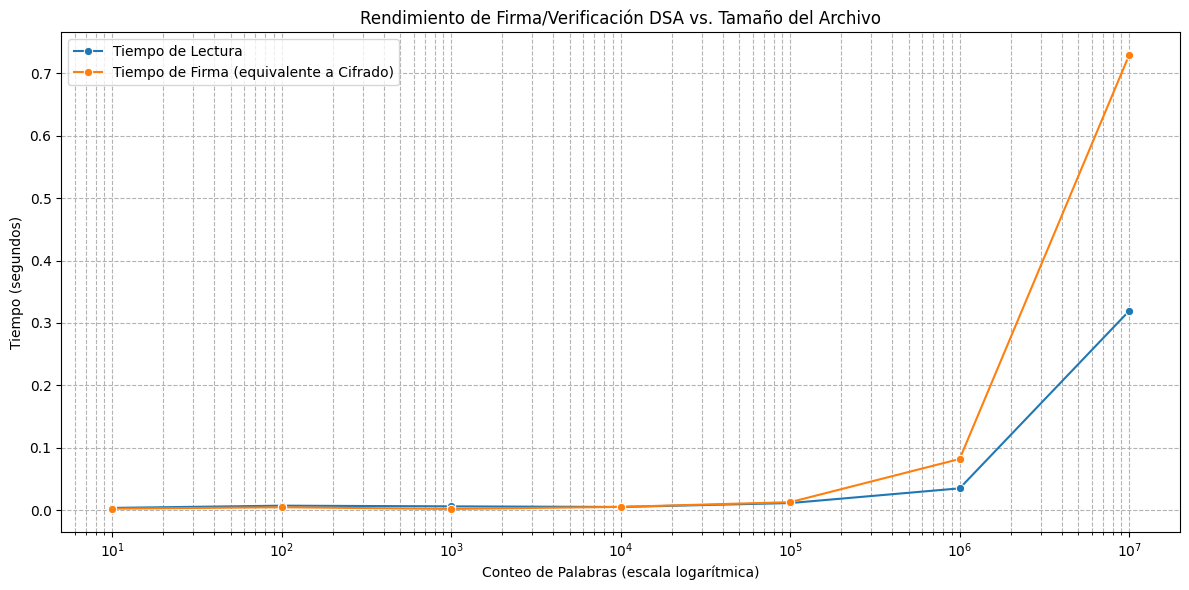

In [43]:
# Graficando resultados para DSA (Asimétrico)
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_drive_performance,
    x='word_count',
    y='read_time',
    label='Tiempo de Lectura',
    marker='o'
)

sns.lineplot(
    data=df_drive_performance,
    x='word_count',
    y='encrypt_time',
    label='Tiempo de Firma (equivalente a Cifrado)',
    marker='o'
)

plt.xscale('log')  # Escala logarítmica por el tamaño creciente
plt.title('Rendimiento de Firma/Verificación DSA vs. Tamaño del Archivo')
plt.xlabel('Conteo de Palabras (escala logarítmica)')
plt.ylabel('Tiempo (segundos)')
plt.grid(True, which="both", ls="--", c='0.7')
plt.legend()
plt.tight_layout()
plt.show()

## Bibliografia

[1] National Institute of Standards and Technology (NIST), FIPS PUB 186-4: Digital Signature Standard (DSS), Jul. 2013 (Revised Feb. 2024).

[2] Google, "Colaboratory," Google. [Online]. Available: https://colab.research.google.com/. [Accessed: 30-oct-2025].